In [6]:
import numpy as np
import os #sistema operacional
import PIL #manipulação de imagem
import torch #aprendizado de maquina
import pandas as pd #manipular tabelas
import time

In [7]:
# Definindo dispositivo de hardware
# if torch.cuda.is_available():
#     device = torch.device('cuda')
# else:
device = torch.device('cpu')

print(device)

cpu


In [8]:
import torchvision
from torchvision import datasets, models, transforms

transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),   # must same as here
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(), # data augmentation
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalization
])
transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),   # must same as here
     transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [9]:
train_dir = "/Datafol/trainfol/"
test_dir = "/Datafol/testfol/"
train_classa_dir = "/Datafol/trainfol/classafol/"
train_classb_dir = "/Datafol/trainfol/classbfol/"
test_classa_dir = "/Datafol/testfol/classafol/"
test_classb_dir = "/Datafol/testfol/classbfol/"

In [11]:
test_dir = ('/home/hub/Residencia/Projetos de treino/flowers/SPLIT_IMG/test/')
train_dir = ('/home/hub/Residencia/Projetos de treino/flowers/SPLIT_IMG/train')
train_dataset = datasets.ImageFolder(train_dir, transforms_train) 
test_dataset = datasets.ImageFolder(test_dir, transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=12, shuffle=True, num_workers=1) 
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=12, shuffle=True, num_workers=1)

In [12]:
print('Treinar o tamanho do conjunto de dados:', len(train_dataset)) 
print('Testar o tamanho do conjunto de dados:', len(test_dataset))
class_names = train_dataset.classes 
print('Nomes de classe:', class_names)

Treinar o tamanho do conjunto de dados: 2525
Testar o tamanho do conjunto de dados: 1297
Nomes de classe: ['-1', '-2', '0', '1', '2']


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

model = models.resnet18(pretrained=True)   # carrregando rede resnet18 model
num_features = model.fc.in_features     # extraindo features da camada fc
model.fc = nn.Linear(num_features, 5) # numero de classes
model = model.to(device)  #  
criterion = nn.CrossEntropyLoss()  #(set loss function)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/home/hub/anaconda3/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/home/hub/anaconda3/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:
import time

train_losses = [] 
train_accs = []
test_losses = []
test_accs = []
num_epochs = 100  # seta numero de epochs
start_time = time.time() # calcular tempo de cada epoca
for epoch in range(num_epochs): # loop para rodar as epocas
    print("Epoch {} running".format(epoch)) # printar epoca rodando
    """ Training Phase """
    model.train()    # treinar modelo
    running_loss = 0.   # zerando metricas
    running_corrects = 0 # zerando metricas
    # loop de imagem no treino, classificando imagem pelo rotulo
    for i, (inputs, labels) in enumerate(train_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device) 
        # passando as entradas e obtendo resultado
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        # obtendo valor da loss e atualizando os pesos da rede
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)
    epoch_acc = running_corrects / len(train_dataset) * 100.
    train_accs.append(epoch_acc)
    print('[Train #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() -start_time))
    
    """ Testing Phase """
    model.eval()
    with torch.no_grad():
        running_loss = 0.
        running_corrects = 0
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        
        epoch_loss = running_loss / len(test_dataset)
        test_losses.append(epoch_loss) 
        epoch_acc = running_corrects / len(test_dataset) * 100.
        test_accs.append(epoch_acc)
        print('[Test #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time()- start_time))

Epoch 0 running
[Train #0] Loss: 0.7394 Acc: 70.9703% Time: 160.8488s
[Test #0] Loss: 0.3560 Acc: 88.6662% Time: 189.9966s
Epoch 1 running
[Train #1] Loss: 0.4637 Acc: 84.0000% Time: 353.8276s
[Test #1] Loss: 0.3084 Acc: 89.4372% Time: 383.8088s
Epoch 2 running
[Train #2] Loss: 0.3783 Acc: 86.7723% Time: 551.3200s
[Test #2] Loss: 0.2753 Acc: 90.9021% Time: 578.3739s
Epoch 3 running
[Train #3] Loss: 0.3470 Acc: 87.3663% Time: 728.6356s
[Test #3] Loss: 0.2739 Acc: 91.2876% Time: 755.4072s
Epoch 4 running
[Train #4] Loss: 0.3139 Acc: 88.3960% Time: 904.7699s
[Test #4] Loss: 0.2970 Acc: 89.7456% Time: 932.0741s
Epoch 5 running
[Train #5] Loss: 0.2873 Acc: 89.7030% Time: 1078.2443s
[Test #5] Loss: 0.2956 Acc: 90.7479% Time: 1105.4429s
Epoch 6 running
[Train #6] Loss: 0.2808 Acc: 90.4158% Time: 1251.7115s
[Test #6] Loss: 0.2819 Acc: 90.8250% Time: 1277.2077s
Epoch 7 running
[Train #7] Loss: 0.2594 Acc: 90.4950% Time: 1420.6523s
[Test #7] Loss: 0.2955 Acc: 91.0563% Time: 1446.2325s
Epoch 8 ru

[Test #64] Loss: 0.3732 Acc: 92.4441% Time: 11571.0099s
Epoch 65 running
[Train #65] Loss: 0.0754 Acc: 97.4257% Time: 11707.1346s
[Test #65] Loss: 0.3409 Acc: 92.5212% Time: 11731.7072s
Epoch 66 running
[Train #66] Loss: 0.0953 Acc: 96.7525% Time: 11868.6085s
[Test #66] Loss: 0.3128 Acc: 93.0609% Time: 11893.1822s
Epoch 67 running
[Train #67] Loss: 0.0822 Acc: 96.8713% Time: 12029.6854s
[Test #67] Loss: 0.3654 Acc: 92.8296% Time: 12054.1642s
Epoch 68 running
[Train #68] Loss: 0.0851 Acc: 96.9109% Time: 12190.0346s
[Test #68] Loss: 0.3609 Acc: 92.1357% Time: 12214.5479s
Epoch 69 running
[Train #69] Loss: 0.0853 Acc: 97.3069% Time: 12350.7077s
[Test #69] Loss: 0.3422 Acc: 92.7525% Time: 12374.9843s
Epoch 70 running
[Train #70] Loss: 0.0770 Acc: 96.7921% Time: 12510.9128s
[Test #70] Loss: 0.3566 Acc: 92.0586% Time: 12535.5031s
Epoch 71 running
[Train #71] Loss: 0.0730 Acc: 97.5842% Time: 12671.6763s
[Test #71] Loss: 0.3188 Acc: 93.3693% Time: 12696.3332s
Epoch 72 running
[Train #72] Loss:

In [22]:
torch.save(model, 'model.pth')

In [15]:
import matplotlib.pyplot as plt

# Mostra grafico da loss
plt.plot(train_losses,label='train loss')
plt.plot(test_losses,label='test loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

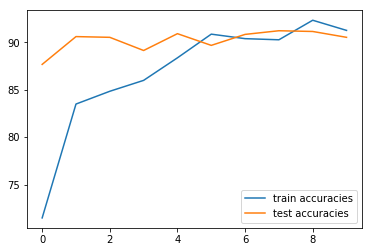

In [16]:
train_accs = [x.cpu() for x in train_accs]
test_accs = [x.cpu() for x in test_accs]

plt.plot(train_accs,label='train accuracies')
plt.plot(test_accs,label='test accuracies')
plt.legend()
plt.show()